In [223]:
import sys
main_dir = '../'
sys.path.append(main_dir)

import numpy as np
import cmasher as cmr
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import matplotlib.patches as patches
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import opennu as on

plt.style.use(main_dir+'sty.mplstyle')
cols = ['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#474747', '#9e9e9e']

In [4]:
N = 1e6
t, jz, _, _, _ = on.solve2nd(N, state='G', gp_ratio=0.99, gd_ratio=0, ti=1e-20,)

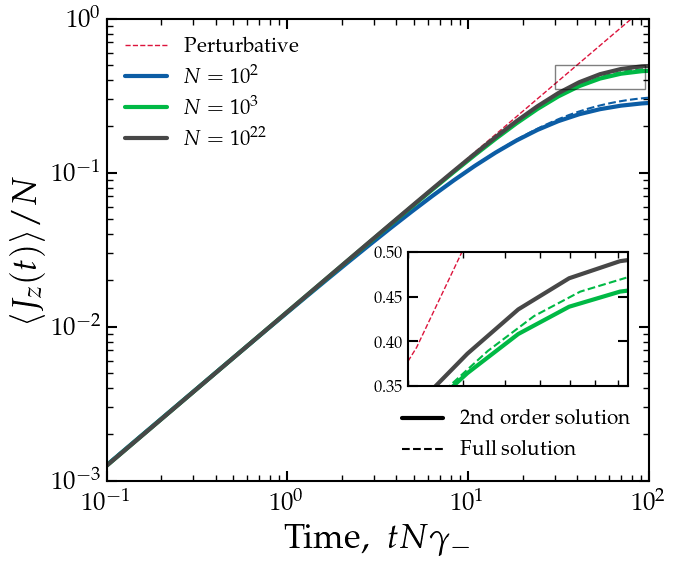

In [249]:
fig, ax = plt.subplots(figsize=(7,6))

n = 100
path  = main_dir+f'../OpenNu/output/N%d'%n
data = np.loadtxt(path+f'/Product_Euler_h0.1_g0.95.txt')
t = data[:,0]
jz = -(data[:,3]-data[0,3])/n
plt.loglog(t, jz, ls='--', c='C0', lw=1.5)


n = 1000
path  = main_dir+f'../OpenNu/output/N%d'%n
data = np.loadtxt(path+f'/Product_Euler_h0.5_g0.95.txt')
t = data[:,0]
jz = -(data[:,3]-data[0,3])/n
plt.loglog(t, jz, ls='--', c='C1', lw=1.5)

tt = np.geomspace(1e-3, 1e3, 100)
plt.loglog(tt,tt*0.05/4, ls='--', c='crimson', lw=1, label='Perturbative')

N = 1e2
t, jz, _, _, _ = on.solve2nd(N, state='P', gp_ratio=0.95, gd_ratio=0, ti=1e-20)
plt.loglog(t, -(jz-jz[0])/N, c='C0', label=r'$N=10^2$')
N = 1e3
t, jz, _, _, _ = on.solve2nd(N, state='P', gp_ratio=0.95, gd_ratio=0, ti=1e-20)
plt.loglog(t, -(jz-jz[0])/N, c='C1', label=r'$N=10^3$')
N = 1e22
t, jz, _, _, _ = on.solve2nd(N, state='P', gp_ratio=0.95, gd_ratio=0, ti=1e-20)
plt.loglog(t, -(jz-jz[0])/N, c='C5', label=r'$N=10^{22}$')


style_legend = [
    Line2D([0], [0], color='black', linestyle='-', label='2nd order solution'),
    Line2D([0], [0], color='black', linestyle='--',lw=1.5,  label='Full solution')
]
legend1 = ax.legend(handles=style_legend, loc='lower right')
ax.add_artist(legend1)

# Define the rectangle in data coordinates
zoom_rect = patches.Rectangle(
    (30, 0.35), 
    65,             
    0.15,       
    linewidth=1,
    edgecolor='k',
    facecolor='none',
    linestyle='-',
    alpha=0.5,
    transform=ax.transData,
    zorder=3
)

ax.add_patch(zoom_rect)


ax.set_xlim(1e-1, 1e2)
ax.set_ylim(1e-3,1)
ax.set_xlabel(r'Time, $~tN\gamma_-$', fontsize=25)
ax.set_ylabel(r'${\langle J_z(t)\rangle}/N$', fontsize=25)
ax.legend()



# Add inset
axins = inset_axes(ax, width="70%", height="50%", loc='center right',
                   bbox_to_anchor=(0.4, 0.06, 0.58, 0.58), bbox_transform=ax.transAxes)


# Replot the same curves in the inset
n = 100
path  = main_dir+f'../OpenNu/output/N%d'%n
data = np.loadtxt(path+f'/Product_Euler_h0.1_g0.95.txt')
t = data[:,0]
jz = -(data[:,3]-data[0,3])/n
axins.loglog(t, jz, ls='--', c='C0', lw=1.5)

n = 1000
path  = main_dir+f'../OpenNu/output/N%d'%n
data = np.loadtxt(path+f'/Product_Euler_h0.5_g0.95.txt')
t = data[:,0]
jz = -(data[:,3]-data[0,3])/n
axins.loglog(t, jz, ls='--', c='C1', lw=1.5)


N = 1e2
t, jz, _, _, _ = on.solve2nd(N, state='P', gp_ratio=0.95, gd_ratio=0, ti=1e-20)
axins.loglog(t, -(jz-jz[0])/N, c='C0')
N = 1e3
t, jz, _, _, _ = on.solve2nd(N, state='P', gp_ratio=0.95, gd_ratio=0, ti=1e-20)
axins.loglog(t, -(jz-jz[0])/N, c='C1')
N = 1e22
t, jz, _, _, _ = on.solve2nd(N, state='P', gp_ratio=0.95, gd_ratio=0, ti=1e-20)
axins.loglog(t, -(jz-jz[0])/N, c='C5')

axins.loglog(t, t*0.05/4, ls='--', c='crimson', lw=1)

axins.set_xlim(30, 95)
axins.set_ylim(0.35, 0.5)
#axins.set_xscale('linear')
axins.set_yscale('linear')

#axins.tick_params(axis='both', which='both', length=0, labelleft=False, labelbottom=False)
axins.tick_params(axis='both', which='both', labelsize=12, labelbottom=False)
plt.show()
fig.savefig(main_dir+'plots/jz.pdf', bbox_inches='tight')

In [ ]:
t = tNgm